In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

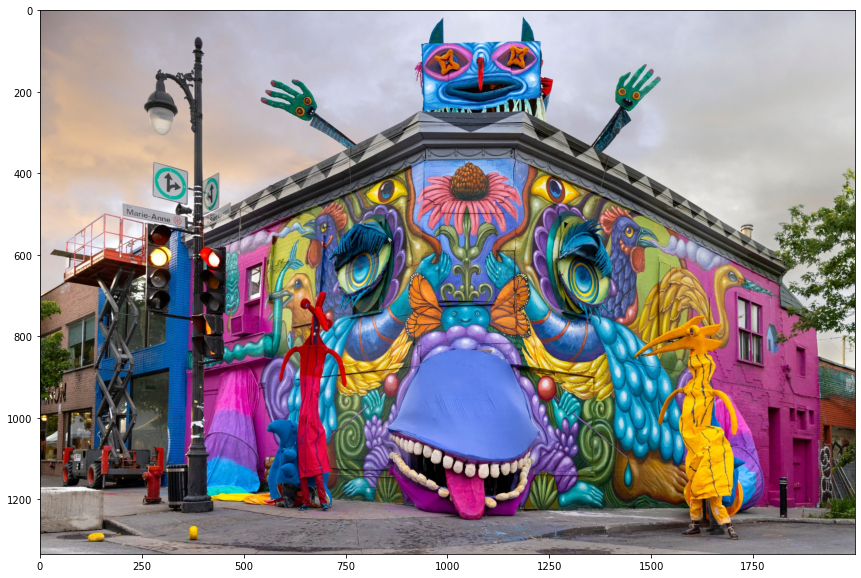

In [2]:
img = cv2.imread('../Data/brissonnet.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

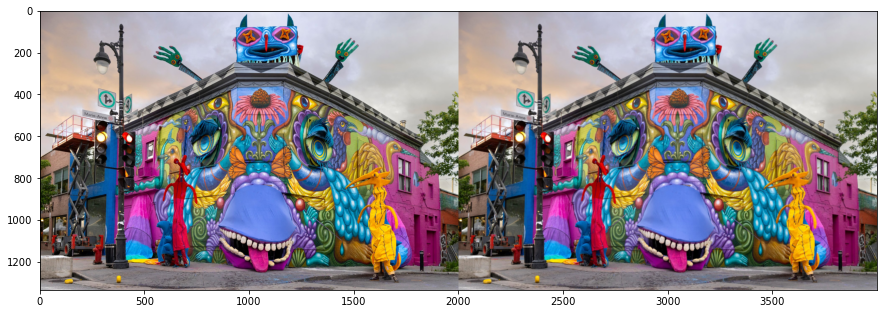

In [16]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=1, sigmaY=1)
plt.imshow(cv2.hconcat([img, unsharp]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


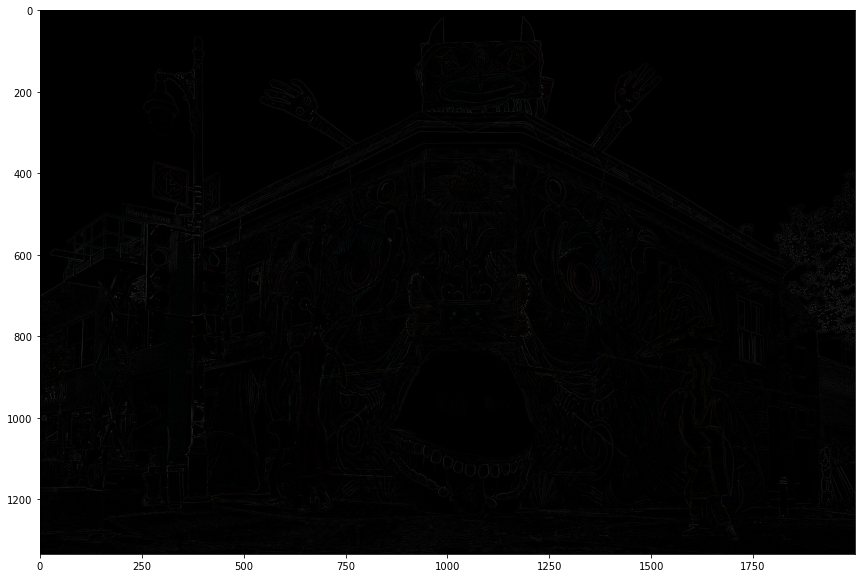

In [24]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
#diff = cv2.subtract(img, unsharp)
diff = np.float32(img) - np.float32(unsharp)
plt.imshow(diff/255.0)

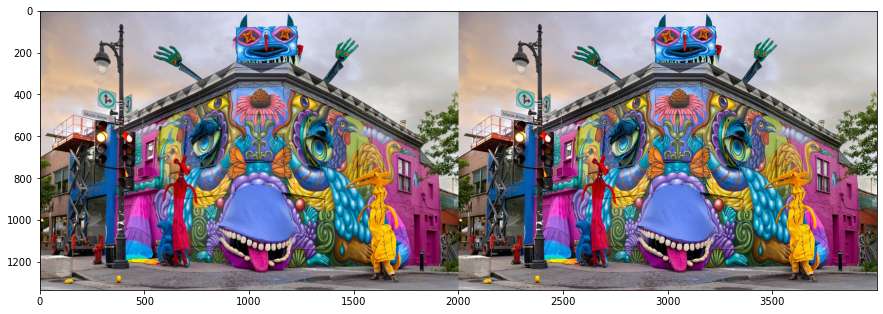

In [39]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount = 1
sharpened = np.uint8(np.clip(np.round(img + diff * amount), a_min=0, a_max=255.0))
plt.imshow(cv2.hconcat([img, sharpened]))

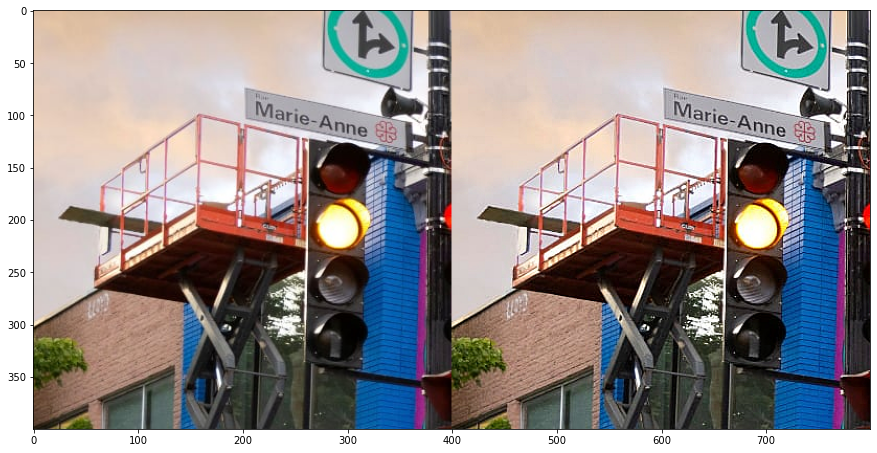

In [40]:
plt.imshow(cv2.hconcat([img[400:800, 0:400], sharpened[400:800, 0:400]]))

**Answers**

It is advisable to select the amount parameter depending on the strength of the blur filter. In my case, the amount is ~1.

If the coefficient is too low, the sharpening effect will be imperceptible or barely noticeable.

If the coefficient is too large, oversharpening artifacts will appear on the image.